In [1]:
#===========Importing Neccessaryy library and module========

#===========Importing Classifier=========
from sklearn.ensemble import RandomForestClassifier

#==========Importing numpy for multidimensional array
import numpy as np 

#=========importing matplotlib for Plotting Graph==========
import matplotlib.pyplot as plt

#=========Loadig model selection for splitting the dataset==============
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#========Importing library for dealing with DataFrame=====
import pandas as pd

import seaborn as sns

In [2]:
#========Loading the dataset======
loan = pd.read_csv('loan_data.csv')

In [3]:
#==========Visualising the Dataset======
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

In [5]:
#=======Checking the presence of Null Values=========

#==== We use built in Function isnull() and sum()

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.dropna( inplace=True)

In [7]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan.shape

(480, 13)

# EDA

# Handling Categorical Values

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  

In [10]:
loan["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
loan.replace({"Male":1,"Female":0},inplace=True)

In [12]:
loan["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
loan["Married"].replace({"Yes":1,"No":0},inplace=True)

In [14]:
loan["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
loan["Self_Employed"].replace({"Yes":1,"No":0},inplace=True)

In [16]:
loan["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
loan["Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [18]:
loan["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [19]:
loan["Property_Area"].replace({"Rural":0,"Urban":1,"Semiurban":2},inplace=True)

In [20]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [21]:
loan.drop(columns="Loan_ID",inplace=True)

In [22]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [23]:
loan["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [24]:
loan["Dependents"].replace({"3+":3},inplace=True)

In [25]:
loan["Dependents"]=loan["Dependents"].astype(int)

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 46.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

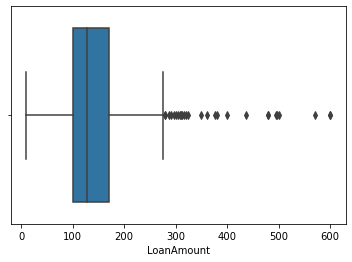

In [27]:
sns.boxplot(loan["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

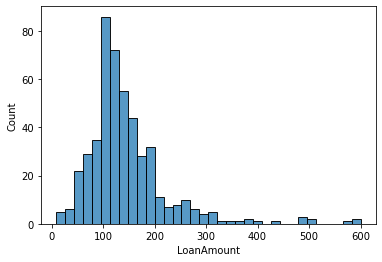

In [28]:
sns.histplot(loan["LoanAmount"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

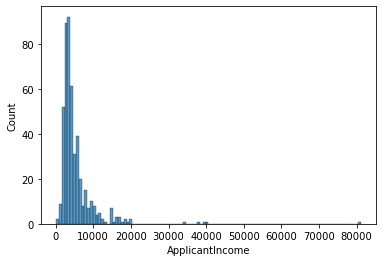

In [29]:
sns.histplot(loan["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

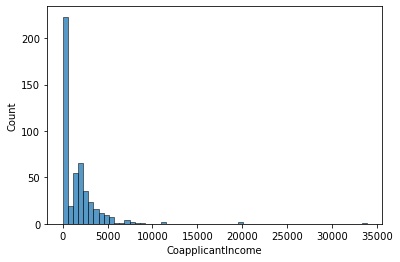

In [30]:
sns.histplot(loan["CoapplicantIncome"])


# Data preparation for Modelling

In [31]:
X = loan.iloc[:, :-1]
y = loan.iloc[:, -1:]

<AxesSubplot:>

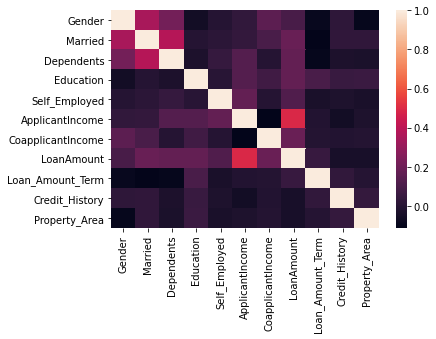

In [32]:
import seaborn as sns
sns.heatmap(X.corr())

In [33]:
# Check for imbalance data
y.value_counts()

Loan_Status
Y              332
N              148
dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)

# Modelling 

# 1.Dicision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}  

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [36]:
grid_search.best_params_

{'max_depth': 2}

In [37]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [38]:
from sklearn.metrics import classification_report
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score, confusion_matrix

In [39]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 17  25]
 [  2 100]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           N       0.89      0.40      0.56        42
           Y       0.80      0.98      0.88       102

    accuracy                           0.81       144
   macro avg       0.85      0.69      0.72       144
weighted avg       0.83      0.81      0.79       144



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8095238095238095
Test Accuracy score: 0.8125


# 2 Bagging with Dicision Tree

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,bootstrap=True)
score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.8041666666666668


In [41]:
#result = reg_rf.predict([[2,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]])
res=grid_search.predict([[0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0]])

In [42]:
res2=grid_search.predict([[1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1]])

In [43]:
res

array(['Y'], dtype=object)

In [44]:
res2

array(['Y'], dtype=object)

# 3 Randomforest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.values.ravel())
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [46]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[19 23]
 [11 91]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           N       0.63      0.45      0.53        42
           Y       0.80      0.89      0.84       102

    accuracy                           0.76       144
   macro avg       0.72      0.67      0.69       144
weighted avg       0.75      0.76      0.75       144



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.7638888888888888


In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [49]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [50]:
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=730; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=730; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=730; total time=   0.6s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=370; total time=   0.3s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=370; total time=   0.3s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=370; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=730; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [2, 5, 8, 11, 14, 17, 20,
                                                      23, 26, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 100, 190, 280, 370,
                                                         460, 550, 640, 730,
                                                         820, 910, 1000]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 730,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [53]:
y_pred_train = rf_random.predict(X_train)
y_pred_test = rf_random.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [54]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[18 24]
 [ 4 98]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           N       0.82      0.43      0.56        42
           Y       0.80      0.96      0.88       102

    accuracy                           0.81       144
   macro avg       0.81      0.69      0.72       144
weighted avg       0.81      0.81      0.78       144



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8055555555555556


In [55]:
prediction2 = rf_random.predict([[0,0,0,1,1,4583,0.0,133.0,360.0,0.0,2]])

In [56]:
prediction2

array(['N'], dtype=object)

# KNearest Neighbour

In [60]:
#imoport model
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train.values.ravel())
pred = knn.predict(X_test)

In [64]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train_knn)
test_accuracy = accuracy_score(y_test, y_pred_test_knn)

In [71]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test_knn))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test_knn))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 6 36]
 [14 88]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           N       0.30      0.14      0.19        42
           Y       0.71      0.86      0.78       102

    accuracy                           0.65       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.59      0.65      0.61       144



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.7222222222222222


# hyperparameter tuning of KNearest Neighbour

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_params = { 'n_neighbors' : [2,3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [77]:
GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [81]:
gs.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [82]:
y_pred_train_gs = gs.predict(X_train)
y_pred_test_gs = gs.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train_gs)
test_accuracy = accuracy_score(y_test, y_pred_test_gs)

In [83]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test_gs))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test_gs))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 3 39]
 [ 3 99]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           N       0.50      0.07      0.12        42
           Y       0.72      0.97      0.82       102

    accuracy                           0.71       144
   macro avg       0.61      0.52      0.47       144
weighted avg       0.65      0.71      0.62       144



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.7083333333333334


# Manual Hyperparamenter tuning

In [86]:
n =list(range(1,30))
accuracy=[]
for i in range (1,30):
    knnl=KNeighborsClassifier(n_neighbors=i)
    knnl.fit(X_train, y_train.values.ravel())
    pred = knnl.predict(X_test)
    ac=accuracy_score(y_test,pred)
    accuracy.append(ac)
    
plt.plot(n,accuracy)
plt.grid(True)
plt.show()   

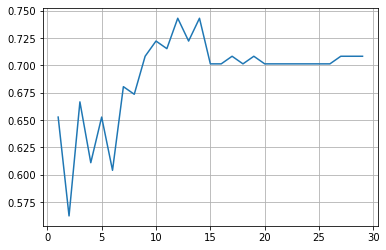

In [87]:
plt.plot(n,accuracy)
plt.grid(True)
plt.show()

In [95]:
kn=KNeighborsClassifier(n_neighbors=14)

kn.fit(X_train, y_train.values.ravel())
pred = kn.predict(X_test)
ac=accuracy_score(y_test,pred)
print(ac)

0.7430555555555556
